CIFAR10에 대한 설명

CIFAR-10은 이미지 분류(classification) 작업에서 널리 사용되는 벤치마크 데이터셋입니다.
10개의 서로 다른 클래스에 속하는 6만 장의 작은 크기 이미지를 포함합니다

학습 데이터: 5만장, 테스트 데이터: 1만장
이미지 형식:
   크기: 32 X 32 
   채널: 3
   각 픽셀 값은 0~255 범위를 갖는다. 

클래스(10개)
비행기, 자동차, 새, 고양이 ... 등 10개의 클래스로 구성되어있다.

폴더 구조는 datasets 폴더를 보셈

1) batches.meta
   label_names 클래스 이름이 들어있음

2) data_batch_1~data_batch_5
   학습 데이터가 5개의 배치로 나뉘어 저장. 
   1만개의 이미지 데이터 포함, 각 파일은 python의 pickle 형식으로 저장, 이미지 데이터와 라벨 포함

3) test_batch
   테스트 데이터, 1만개의 이미지 및 라벨 포함

데이터는 1차원 배열로 저장: 32×32×3=3072.
배열은 [R1, R2, ..., R1024, G1, G2, ..., G1024, B1, B2, ..., B1024] 형태로 저장.
라벨은 정수 값으로 저장


In [1]:
#한번 예시를 보시죠.
import pickle
import numpy as np

def load_cifar10_batch(file):
    with open(file,'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
        images = data_dict[b'data']
        labels = np.array(data_dict[b'labels'])

        images = images.reshape(-1, 3, 32, 32).transpose(0,2,3,1)
    return images, labels

images, labels = load_cifar10_batch('./datasets/cifar-10-batches-py/data_batch_1')
print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

Images shape: (10000, 32, 32, 3), Labels shape: (10000,)


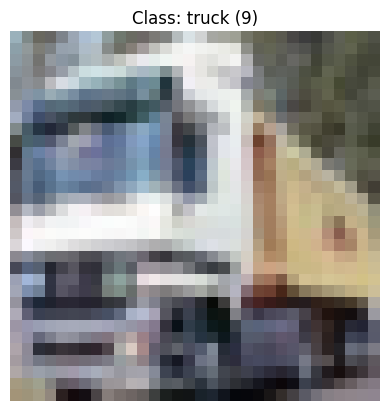

In [5]:
import matplotlib.pyplot as plt

#단일 이미지 확인
index = 1 # 보고 싶은 이미지의 인덱스
image = images[index]
label = labels[index]

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
class_name = label_names[label]

plt.imshow(image)
plt.title(f"Class: {class_name} ({label})")
plt.axis('off')
plt.show()